In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
df = pd.read_table('Data_28_F29.txt', delimiter=',')

In [3]:
df.columns.values

array(['FID', 'ID', 'FIELD', 'OID_1', 'YLD00', 'YLD01', 'YLD02', 'YLD03',
       'AVGYLD', 'ELE', 'SLOPE', 'CURV', 'PRO', 'PLAN', 'EC_SH', 'EC_DP',
       'BAND1', 'BAND2', 'BAND3', 'BAND4', 'VI00_520', 'VI00_528',
       'VI00_613', 'VI00_707', 'VI00_715', 'VI00_723', 'VI00_816',
       'VI00_824', 'VI00_901', 'VI00_917', 'VI01_616', 'VI01_624',
       'VI01_710', 'VI01_827', 'VI01_912', 'VI02_518', 'VI02_526',
       'VI02_619', 'VI02_713', 'VI02_721', 'VI02_830', 'VI02_907',
       'VI02_923', 'VI03_505', 'VI03_529', 'VI03_606', 'VI03_622',
       'VI03_724', 'VI03_825', 'VI03_926', 'STD00', 'STD01', 'STD02',
       'STD03', 'CV', 'M3_00', 'M3_01', 'M3_02', 'M3_03', 'M3_AV', 'CL_AV',
       'CL_00', 'CL_01', 'CL_02', 'CL_03'], dtype=object)

In [4]:
columns = ['FIELD','YLD00','YLD01','YLD02','YLD03','AVGYLD','ELE','SLOPE','CURV',
           'PRO','PLAN','EC_SH','EC_DP','BAND1','BAND2','BAND3','BAND4','VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
ndvi_cols = ['VI00_520','VI00_528',
           'VI00_613','VI00_707','VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917',
           'VI01_616','VI01_624','VI01_710','VI01_827','VI01_912','VI02_518','VI02_526','VI02_619',
           'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923','VI03_505','VI03_529','VI03_606',
           'VI03_622','VI03_724','VI03_825','VI03_926']
band_cols = ['BAND1','BAND2','BAND3','BAND4']
yld_cols = ['YLD00','YLD01','YLD02','YLD03','AVGYLD']

In [5]:
df_use = df[columns]
df_use.head()

,FIELD,YLD00,YLD01,YLD02,YLD03,AVGYLD,ELE,SLOPE,CURV,PRO,...,VI02_830,VI02_907,VI02_923,VI03_505,VI03_529,VI03_606,VI03_622,VI03_724,VI03_825,VI03_926
0,C29,1012.799988,1201.900024,943.599976,1082,1060.099976,1080.06,0.0879,0.002694,-0.001178,...,0.359116,0.273810,0.026178,-0.042553,-0.215094,-0.157303,-0.136364,-0.021505,0.128571,0.085366
1,C29,930.000000,1352.000000,1033.099976,1202,1129.199951,1080.08,0.0575,0.001403,-0.000473,...,0.439560,0.345238,0.096774,-0.053763,-0.220974,-0.169399,-0.163842,-0.010870,0.144828,0.144578
2,C29,902.000000,1389.400024,1073.699951,1196,1140.300049,1080.10,0.0906,-0.004624,0.004098,...,0.445652,0.345238,0.124324,-0.057592,-0.219331,-0.170213,-0.184358,-0.016043,0.140940,0.111111
3,C29,931.900024,1348.099976,1042.400024,1120,1110.599976,1080.13,0.1291,-0.001335,0.001011,...,0.425532,0.345238,0.104167,-0.071429,-0.236364,-0.165775,-0.169399,0.005405,0.120000,0.135135
4,C29,885.000000,1301.199951,978.400024,1119,1070.800049,1080.18,0.1515,0.002538,-0.001229,...,0.387097,0.321637,0.094737,-0.066667,-0.226277,-0.183246,-0.169399,-0.005291,0.099338,0.069767


In [6]:
def yld_category(yld):
    if yld <= 603:
        return 1
    elif 603 < yld <= 766:
        return 2
    elif 766 < yld <= 882:
        return 3
    elif 882 < yld <= 956:
        return 4
    elif 956 < yld <= 1018:
        return 5
    elif 1018 < yld <= 1075:
        return 6
    elif 1075 < yld <= 1134:
        return 7
    elif 1134 < yld <= 1200:
        return 8
    elif 1200 < yld <= 1280:
        return 9
    elif yld > 1280:
        return 10

In [40]:
FY00_cols = ['FIELD_C28', 'FIELD_C29', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI00_520','VI00_528','VI00_613','VI00_707',
             'VI00_715','VI00_723','VI00_816','VI00_824','VI00_901','VI00_917','YLD00']
FY01_cols = ['FIELD_C28', 'FIELD_C29', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI01_616','VI01_624','VI01_710','VI01_827',
             'VI01_912','YLD01']
FY02_cols = ['FIELD_C28', 'FIELD_C29', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI02_518','VI02_526','VI02_619',
             'VI02_713','VI02_721','VI02_830','VI02_907','VI02_923', 'YLD02']
FY03_cols = ['FIELD_C28', 'FIELD_C29', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4','VI03_505','VI03_529','VI03_606',
             'VI03_622','VI03_724','VI03_825','VI03_926','YLD03']
AVGYLD_cols = ['FIELD_C28', 'FIELD_C29', 'ELE','SLOPE','CURV','PRO','PLAN','EC_SH','EC_DP',
             'BAND1','BAND2','BAND3','BAND4', 'AVGYLD']

In [8]:
FIELD = pd.get_dummies(df_use['FIELD'] , prefix = 'FIELD')
full = pd.concat([FIELD, df_use.loc[:, df_use.columns != 'FIELD']], axis=1)
full.head()

,FIELD_C28,FIELD_C29,YLD00,YLD01,YLD02,YLD03,AVGYLD,ELE,SLOPE,CURV,...,VI02_830,VI02_907,VI02_923,VI03_505,VI03_529,VI03_606,VI03_622,VI03_724,VI03_825,VI03_926
0,0,1,1012.799988,1201.900024,943.599976,1082,1060.099976,1080.06,0.0879,0.002694,...,0.359116,0.273810,0.026178,-0.042553,-0.215094,-0.157303,-0.136364,-0.021505,0.128571,0.085366
1,0,1,930.000000,1352.000000,1033.099976,1202,1129.199951,1080.08,0.0575,0.001403,...,0.439560,0.345238,0.096774,-0.053763,-0.220974,-0.169399,-0.163842,-0.010870,0.144828,0.144578
2,0,1,902.000000,1389.400024,1073.699951,1196,1140.300049,1080.10,0.0906,-0.004624,...,0.445652,0.345238,0.124324,-0.057592,-0.219331,-0.170213,-0.184358,-0.016043,0.140940,0.111111
3,0,1,931.900024,1348.099976,1042.400024,1120,1110.599976,1080.13,0.1291,-0.001335,...,0.425532,0.345238,0.104167,-0.071429,-0.236364,-0.165775,-0.169399,0.005405,0.120000,0.135135
4,0,1,885.000000,1301.199951,978.400024,1119,1070.800049,1080.18,0.1515,0.002538,...,0.387097,0.321637,0.094737,-0.066667,-0.226277,-0.183246,-0.169399,-0.005291,0.099338,0.069767


In [42]:
full00 = full[FY00_cols]
full00['YLD00_Category'] = full00['YLD00'].apply(lambda x: yld_category(x))


full01 = full[FY01_cols]
full01['YLD01_Category'] = full01['YLD01'].apply(lambda x: yld_category(x))

full02 = full[FY02_cols]
full02['YLD02_Category'] = full02['YLD02'].apply(lambda x: yld_category(x))

full03 = full[FY03_cols]
full03['YLD03_Category'] = full03['YLD03'].apply(lambda x: yld_category(x))

fullAVG = full[AVGYLD_cols]
fullAVG['AVGYLD_Category'] = fullAVG['AVGYLD'].apply(lambda x: yld_category(x))

In [43]:
full00_X = full00.loc[:, full00.columns != 'YLD00']
full00_y = full00.YLD00_Category

full01_X = full01.loc[:, full01.columns != 'YLD01']
full01_y = full01.YLD01_Category

full02_X = full02.loc[:, full02.columns != 'YLD02']
full02_y = full02.YLD02_Category

full03_X = full03.loc[:, full03.columns != 'YLD03']
full03_y = full03.YLD03_Category

fullAVG_X = fullAVG.loc[:, fullAVG.columns != 'AVGYLD']
fullAVG_y = fullAVG.AVGYLD_Category

In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

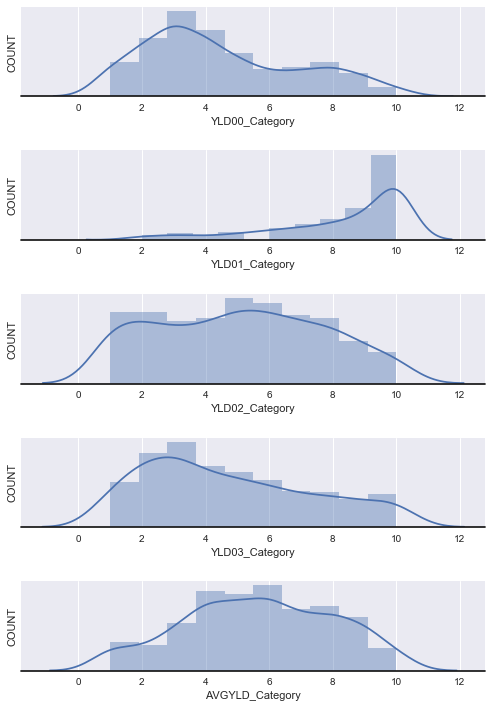

In [45]:
# sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(7, 10), sharex=True)

# YLD00
sns.distplot(full00_X['YLD00_Category'],bins=10,ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("COUNT")

# YLD01
sns.distplot(full01_X['YLD01_Category'],bins=10,ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("COUNT")

# YLD02
sns.distplot(full02_X['YLD02_Category'],bins=10,ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("COUNT")

# YLD03
sns.distplot(full03_X['YLD03_Category'],bins=10,ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("COUNT")

# AVGYLD
sns.distplot(fullAVG_X['AVGYLD_Category'],bins=10,ax=ax5)
ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylabel("COUNT")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

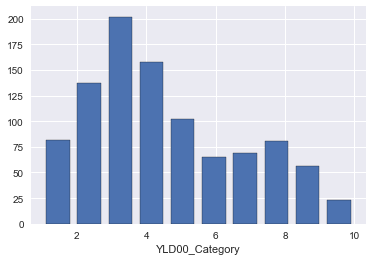

In [31]:
sns.set(color_codes=True)
sns.distplot(full00_X['YLD00_Category'], kde=False, bins=10, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})

In [23]:
full00_X['YLD00_Category'].value_counts()

3     202
4     158
2     137
5     102
1      82
8      81
7      69
6      65
9      56
10     23
Name: YLD00_Category, dtype: int64

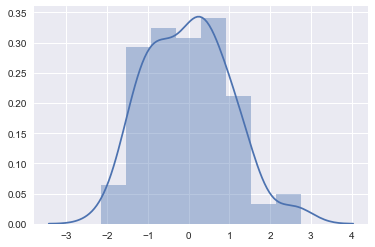

In [13]:
sns.set(color_codes=True)

x = np.random.normal(size=100)
sns.distplot(x);

In [17]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import scikitplot as skplt

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def plot_roc(x_test, y_test, model):
    predicted_probas = model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test, predicted_probas, figsize =(10,10))
    plt.show()
    
res = {}

##### decision tree

###### tune parameter

In [18]:
warnings.filterwarnings('ignore')

dt_tune_run = False

if dt_tune_run:
    parameter_grid = {
        'max_features':range(3,9,1),
        'random_state':range(0,10,1),
        'min_samples_leaf':range(1,10,1),
    #         'min_samples_split': range(2, 20, 1)
    }
    forest = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                    min_samples_split=6, max_leaf_nodes=None,
                                    min_impurity_split=0.005, min_weight_fraction_leaf=0.0,
                                    presort=False, splitter='random')

    cross_validation = StratifiedKFold(n_splits=10)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(full03_X, full03_y)
    DecisionTreeModel = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))


In [19]:
# score_measure_list = ['accuracy', 'f1_micro', 'f1_macro', 'f1_weighted',
#               'precision_micro', 'precision_macro', 'precision_weighted',
#               'recall_micro', 'recall_macro', 'recall_weighted']

final = {}
accuracy = []
f1_weighted = []
precision_weighted = []
recall_weighted = []

score_measure_list = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# dt00
df00_parameters = {'max_features': 8, 'random_state': 7, 'min_samples_leaf': 1, 'min_samples_split': 6,
              'class_weight': None, 'criterion': 'gini', 'max_depth': None,
              'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
DT00_Model = DecisionTreeClassifier(**df00_parameters)
full00_X_train, full00_X_test, full00_y_train, full00_y_test = train_test_split(full00_X, full00_y, test_size=.3,
                                                random_state=0)
DT00_Model.fit(full00_X_train, full00_y_train)

# dt01
df01_parameters = {'max_features': 8, 'random_state': 8, 'min_samples_leaf': 5, 'min_samples_split': 6,
              'class_weight': None, 'criterion': 'gini', 'max_depth': None,
              'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
DT01_Model = DecisionTreeClassifier(**df01_parameters)
full01_X_train, full01_X_test, full01_y_train, full01_y_test = train_test_split(full01_X, full01_y, test_size=.3,
                                                random_state=0)
DT01_Model.fit(full01_X_train, full01_y_train)

# dt02
df02_parameters = {'max_features': 8, 'random_state': 4, 'min_samples_leaf': 1, 'min_samples_split': 6,
              'class_weight': None, 'criterion': 'gini', 'max_depth': None,
              'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
DT02_Model = DecisionTreeClassifier(**df02_parameters)
full02_X_train, full02_X_test, full02_y_train, full02_y_test = train_test_split(full02_X, full02_y, test_size=.3,
                                                random_state=0)
DT02_Model.fit(full02_X_train, full02_y_train)

# dt03
df03_parameters = {'max_features': 7, 'random_state': 4, 'min_samples_leaf': 2, 'min_samples_split': 6,
              'class_weight': None, 'criterion': 'gini', 'max_depth': None,
              'max_leaf_nodes': None, 'min_impurity_split': 0.005, 'min_weight_fraction_leaf': 0.0,
              'presort': False, 'splitter': 'random'}
DT03_Model = DecisionTreeClassifier(**df03_parameters)
full03_X_train, full03_X_test, full03_y_train, full03_y_test = train_test_split(full03_X, full03_y, test_size=.3,
                                                random_state=0)
DT03_Model.fit(full03_X_train, full03_y_train)


dt_data_model = {
    '00': {
        'X': full00_X,
        'y': full00_y,
        'train_X': full00_X_train,
        'train_y': full00_y_train,
        'test_X': full00_X_test,
        'test_y': full00_y_test,
        'model': DT00_Model
    },
    '01': {
        'X': full01_X,
        'y': full01_y,
        'train_X': full01_X_train,
        'train_y': full01_y_train,
        'test_X': full01_X_test,
        'test_y': full01_y_test,
        'model': DT01_Model
    },
    '02': {
        'X': full02_X,
        'y': full02_y,
        'train_X': full02_X_train,
        'train_y': full02_y_train,
        'test_X': full02_X_test,
        'test_y': full02_y_test,
        'model': DT02_Model
    },
    '03': {
        'X': full03_X,
        'y': full03_y,
        'train_X': full03_X_train,
        'train_y': full03_y_train,
        'test_X': full03_X_test,
        'test_y': full03_y_test,
        'model': DT03_Model
    }
}

dt = {
    '00': {},
    '01': {},
    '02': {},
    '03': {}
}
for year in ['00', '01', '02', '03']:
    for score_measure in score_measure_list:
        res = compute_score(dt_data_model[year]['model'], dt_data_model[year]['X'], dt_data_model[year]['y'], scoring = score_measure)
        res = round(res, 5)
        if score_measure == 'accuracy':
            accuracy.append(res)
        elif score_measure == 'f1_weighted':
            f1_weighted.append(res)
        elif score_measure == 'precision_weighted':
            precision_weighted.append(res)
        elif score_measure == 'recall_weighted':
            recall_weighted.append(res)
        
        dt[year][score_measure] = round(res, 5)
        print('Model: dt, Year: {}, measure: {}, score: {}'.format(year, score_measure, round(res, 5) ))
final['dt'] = dt

Model: dt, Year: 00, measure: accuracy, score: 0.85741
Model: dt, Year: 00, measure: f1_weighted, score: 0.85348
Model: dt, Year: 00, measure: precision_weighted, score: 0.8703
Model: dt, Year: 00, measure: recall_weighted, score: 0.85741
Model: dt, Year: 01, measure: accuracy, score: 0.82783
Model: dt, Year: 01, measure: f1_weighted, score: 0.80221
Model: dt, Year: 01, measure: precision_weighted, score: 0.80247
Model: dt, Year: 01, measure: recall_weighted, score: 0.82783
Model: dt, Year: 02, measure: accuracy, score: 0.86165
Model: dt, Year: 02, measure: f1_weighted, score: 0.86258
Model: dt, Year: 02, measure: precision_weighted, score: 0.88478
Model: dt, Year: 02, measure: recall_weighted, score: 0.86165
Model: dt, Year: 03, measure: accuracy, score: 0.86771
Model: dt, Year: 03, measure: f1_weighted, score: 0.86284
Model: dt, Year: 03, measure: precision_weighted, score: 0.88183
Model: dt, Year: 03, measure: recall_weighted, score: 0.86771


##### ROC Curve for Decision Tree

In [20]:
# for year in ['00', '01', '02', '03']:
#     X_test = dt_data_model[year]['test_X']
#     y_test = dt_data_model[year]['test_y']
#     model = dt_data_model[year]['model']
#     plot_roc(X_test, y_test, model)

#### SVM

In [1]:
warnings.filterwarnings('ignore')

svm_tune_run = False

if svm_tune_run:
    parameter_grid = {
         'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'gamma' : [0.001, 0.01, 0.1, 1]
     }
    #     [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
    #                      'C': [1, 10, 100, 1000]},
    #                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    forest = SVC(cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, kernel='rbf',
              max_iter=-1, probability=True, random_state=None, shrinking=True,
              tol=0.001, verbose=False)

    cross_validation = StratifiedKFold(n_splits=10)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(full03_X, full03_y)
    SVCModel = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))


NameError: name 'warnings' is not defined

In [22]:
score_measure_list = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# svm00
svm00_parameters = {'C': 1000, 'gamma': 0.001,
              'cache_size': 200, 'class_weight': None, 'coef0': 0.0,
              'decision_function_shape': 'ovr', 'degree': 3, 'kernel': 'rbf',
              'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True,
              'tol': 0.001, 'verbose': False}
SVM00_Model = SVC(**svm00_parameters)
full00_X_train, full00_X_test, full00_y_train, full00_y_test = train_test_split(full00_X, full00_y, test_size=.3,
                                                random_state=0)
SVM00_Model.fit(full00_X_train, full00_y_train)

# svm01
svm01_parameters = {'C': 1000, 'gamma': 0.001,
              'cache_size': 200, 'class_weight': None, 'coef0': 0.0,
              'decision_function_shape': 'ovr', 'degree': 3, 'kernel': 'rbf',
              'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True,
              'tol': 0.001, 'verbose': False}
SVM01_Model = SVC(**svm01_parameters)
full01_X_train, full01_X_test, full01_y_train, full01_y_test = train_test_split(full01_X, full01_y, test_size=.3,
                                                random_state=0)
SVM01_Model.fit(full01_X_train, full01_y_train)

# svm02
svm02_parameters = {'C': 1000, 'gamma': 0.001,
              'cache_size': 200, 'class_weight': None, 'coef0': 0.0,
              'decision_function_shape': 'ovr', 'degree': 3, 'kernel': 'rbf',
              'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True,
              'tol': 0.001, 'verbose': False}
SVM02_Model = SVC(**svm02_parameters)
full02_X_train, full02_X_test, full02_y_train, full02_y_test = train_test_split(full02_X, full02_y, test_size=.3,
                                                random_state=0)
SVM02_Model.fit(full02_X_train, full02_y_train)

# svm03
svm03_parameters = {'C': 1000, 'gamma': 0.001,
              'cache_size': 200, 'class_weight': None, 'coef0': 0.0,
              'decision_function_shape': 'ovr', 'degree': 3, 'kernel': 'rbf',
              'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True,
              'tol': 0.001, 'verbose': False}
SVM03_Model = SVC(**svm03_parameters)
full03_X_train, full03_X_test, full03_y_train, full03_y_test = train_test_split(full03_X, full03_y, test_size=.3,
                                                random_state=0)
SVM03_Model.fit(full03_X_train, full03_y_train)


svm_data_model = {
    '00': {
        'X': full00_X,
        'y': full00_y,
        'train_X': full00_X_train,
        'train_y': full00_y_train,
        'test_X': full00_X_test,
        'test_y': full00_y_test,
        'model': SVM00_Model
    },
    '01': {
        'X': full01_X,
        'y': full01_y,
        'train_X': full01_X_train,
        'train_y': full01_y_train,
        'test_X': full01_X_test,
        'test_y': full01_y_test,
        'model': SVM01_Model
    },
    '02': {
        'X': full02_X,
        'y': full02_y,
        'train_X': full02_X_train,
        'train_y': full02_y_train,
        'test_X': full02_X_test,
        'test_y': full02_y_test,
        'model': SVM02_Model
    },
    '03': {
        'X': full03_X,
        'y': full03_y,
        'train_X': full03_X_train,
        'train_y': full03_y_train,
        'test_X': full03_X_test,
        'test_y': full03_y_test,
        'model': SVM03_Model
    }
}

svm = {
    '00': {},
    '01': {},
    '02': {},
    '03': {}
}
for year in ['00', '01', '02', '03']:
    for score_measure in score_measure_list:
        res = compute_score(svm_data_model[year]['model'], svm_data_model[year]['X'], svm_data_model[year]['y'], scoring = score_measure)
        res = round(res, 5)
        if score_measure == 'accuracy':
            accuracy.append(res)
        elif score_measure == 'f1_weighted':
            f1_weighted.append(res)
        elif score_measure == 'precision_weighted':
            precision_weighted.append(res)
        elif score_measure == 'recall_weighted':
            recall_weighted.append(res)
        
        svm[year][score_measure] = round(res, 5)
        print('Model: svm, Year: {}, measure: {}, score: {}'.format(year, score_measure, round(res, 5) ))
final['svm'] = svm

Model: svm, Year: 00, measure: accuracy, score: 0.84194
Model: svm, Year: 00, measure: f1_weighted, score: 0.83528
Model: svm, Year: 00, measure: precision_weighted, score: 0.88119
Model: svm, Year: 00, measure: recall_weighted, score: 0.84194
Model: svm, Year: 01, measure: accuracy, score: 0.85976
Model: svm, Year: 01, measure: f1_weighted, score: 0.85363
Model: svm, Year: 01, measure: precision_weighted, score: 0.87554
Model: svm, Year: 01, measure: recall_weighted, score: 0.85976
Model: svm, Year: 02, measure: accuracy, score: 0.96691
Model: svm, Year: 02, measure: f1_weighted, score: 0.96652
Model: svm, Year: 02, measure: precision_weighted, score: 0.97015
Model: svm, Year: 02, measure: recall_weighted, score: 0.96691
Model: svm, Year: 03, measure: accuracy, score: 0.8613
Model: svm, Year: 03, measure: f1_weighted, score: 0.85504
Model: svm, Year: 03, measure: precision_weighted, score: 0.87531
Model: svm, Year: 03, measure: recall_weighted, score: 0.8613


In [23]:
# for year in ['00', '01', '02', '03']:
#     X_test = svm_data_model[year]['test_X']
#     y_test = svm_data_model[year]['test_y']
#     model = svm_data_model[year]['model']
#     plot_roc(X_test, y_test, model)

##### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

run_gs = False

if run_gs:
    
    parameter_grid = {
         'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'penalty': ['l1', 'l2']
     }

#     forest = LogisticRegression(intercept_scaling=1,
#                                 dual=False, fit_intercept=True,
#                                 penalty='l2', tol=0.0001)
    forest = LogisticRegression()
    
    cross_validation = StratifiedKFold(n_splits=10)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    LogitModel = grid_search.fit(full03_X, full03_y)
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Tuned Logistic Regression Parameters: {}'.format(grid_search.best_params_))

In [25]:
score_measure_list = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# logit00
logit00_parameters = {'C': 1, 'penalty': 'l1'}
LOGIT00_Model = LogisticRegression(**logit00_parameters)
full00_X_train, full00_X_test, full00_y_train, full00_y_test = train_test_split(full00_X, full00_y, test_size=.3,
                                                random_state=0)
LOGIT00_Model.fit(full00_X_train, full00_y_train)

# logit01
logit01_parameters = {'C': 1, 'penalty': 'l1'}
LOGIT01_Model = LogisticRegression(**logit01_parameters)
full01_X_train, full01_X_test, full01_y_train, full01_y_test = train_test_split(full01_X, full01_y, test_size=.3,
                                                random_state=0)
LOGIT01_Model.fit(full01_X_train, full01_y_train)

# logit02
logit02_parameters = {'C': 0.1, 'penalty': 'l1'}
LOGIT02_Model = LogisticRegression(**logit02_parameters)
full02_X_train, full02_X_test, full02_y_train, full02_y_test = train_test_split(full02_X, full02_y, test_size=.3,
                                                random_state=0)
LOGIT02_Model.fit(full02_X_train, full02_y_train)

# logit03
logit03_parameters = {'C': 1, 'penalty': 'l1'}
LOGIT03_Model = LogisticRegression(**logit03_parameters)
full03_X_train, full03_X_test, full03_y_train, full03_y_test = train_test_split(full03_X, full03_y, test_size=.3,
                                                random_state=0)
LOGIT03_Model.fit(full03_X_train, full03_y_train)


logit_data_model = {
    '00': {
        'X': full00_X,
        'y': full00_y,
        'train_X': full00_X_train,
        'train_y': full00_y_train,
        'test_X': full00_X_test,
        'test_y': full00_y_test,
        'model': LOGIT00_Model
    },
    '01': {
        'X': full01_X,
        'y': full01_y,
        'train_X': full01_X_train,
        'train_y': full01_y_train,
        'test_X': full01_X_test,
        'test_y': full01_y_test,
        'model': LOGIT01_Model
    },
    '02': {
        'X': full02_X,
        'y': full02_y,
        'train_X': full02_X_train,
        'train_y': full02_y_train,
        'test_X': full02_X_test,
        'test_y': full02_y_test,
        'model': LOGIT02_Model
    },
    '03': {
        'X': full03_X,
        'y': full03_y,
        'train_X': full03_X_train,
        'train_y': full03_y_train,
        'test_X': full03_X_test,
        'test_y': full03_y_test,
        'model': LOGIT03_Model
    }
}

logit = {
    '00': {},
    '01': {},
    '02': {},
    '03': {}
}
for year in ['00', '01', '02', '03']:
    for score_measure in score_measure_list:
        res = compute_score(logit_data_model[year]['model'], logit_data_model[year]['X'], logit_data_model[year]['y'], scoring = score_measure)
        
        res = round(res, 5)
        if score_measure == 'accuracy':
            accuracy.append(res)
        elif score_measure == 'f1_weighted':
            f1_weighted.append(res)
        elif score_measure == 'precision_weighted':
            precision_weighted.append(res)
        elif score_measure == 'recall_weighted':
            recall_weighted.append(res)
        
        logit[year][score_measure] = round(res, 5)
        print('Model: logit, Year: {}, measure: {}, score: {}'.format(year, score_measure, round(res, 5) ))
final['logit'] = logit

Model: logit, Year: 00, measure: accuracy, score: 0.52945
Model: logit, Year: 00, measure: f1_weighted, score: 0.47508
Model: logit, Year: 00, measure: precision_weighted, score: 0.51212
Model: logit, Year: 00, measure: recall_weighted, score: 0.5274
Model: logit, Year: 01, measure: accuracy, score: 0.70629
Model: logit, Year: 01, measure: f1_weighted, score: 0.67722
Model: logit, Year: 01, measure: precision_weighted, score: 0.66837
Model: logit, Year: 01, measure: recall_weighted, score: 0.70625
Model: logit, Year: 02, measure: accuracy, score: 0.49251
Model: logit, Year: 02, measure: f1_weighted, score: 0.47189
Model: logit, Year: 02, measure: precision_weighted, score: 0.51651
Model: logit, Year: 02, measure: recall_weighted, score: 0.49145
Model: logit, Year: 03, measure: accuracy, score: 0.50151
Model: logit, Year: 03, measure: f1_weighted, score: 0.46002
Model: logit, Year: 03, measure: precision_weighted, score: 0.45735
Model: logit, Year: 03, measure: recall_weighted, score: 0

In [26]:
# for year in ['00', '01', '02', '03']:
#     X_test = logit_data_model[year]['test_X']
#     y_test = logit_data_model[year]['test_y']
#     model = logit_data_model[year]['model']
#     plot_roc(X_test, y_test, model)

###### knn

In [30]:
from sklearn.neighbors import KNeighborsClassifier

run_gs = False

if run_gs:
    
    parameter_grid = {
         'n_neighbors': range(1, 21, 1)
     }

    forest = KNeighborsClassifier()
    
    cross_validation = StratifiedKFold(n_splits=10)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    LogitModel = grid_search.fit(full03_X, full03_y)
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Tuned Logistic Regression Parameters: {}'.format(grid_search.best_params_))

Best score: 0.29435897435897435
Tuned Logistic Regression Parameters: {'n_neighbors': 1}


In [31]:
score_measure_list = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

# knn00
knn00_parameters = {'n_neighbors': 1}
KNN00_Model = KNeighborsClassifier(**knn00_parameters)
full00_X_train, full00_X_test, full00_y_train, full00_y_test = train_test_split(full00_X, full00_y, test_size=.3,
                                                random_state=0)
KNN00_Model.fit(full00_X_train, full00_y_train)

# knnit01
knn01_parameters = {'n_neighbors': 9}
KNN01_Model = KNeighborsClassifier(**knn01_parameters)
full01_X_train, full01_X_test, full01_y_train, full01_y_test = train_test_split(full01_X, full01_y, test_size=.3,
                                                random_state=0)
KNN01_Model.fit(full01_X_train, full01_y_train)

# knn02
knn02_parameters = {'n_neighbors': 1}
KNN02_Model = KNeighborsClassifier(**knn02_parameters)
full02_X_train, full02_X_test, full02_y_train, full02_y_test = train_test_split(full02_X, full02_y, test_size=.3,
                                                random_state=0)
KNN02_Model.fit(full02_X_train, full02_y_train)

# knn03
knn03_parameters = {'n_neighbors': 1}
KNN03_Model = KNeighborsClassifier(**knn03_parameters)
full03_X_train, full03_X_test, full03_y_train, full03_y_test = train_test_split(full03_X, full03_y, test_size=.3,
                                                random_state=0)
KNN03_Model.fit(full03_X_train, full03_y_train)


knn_data_model = {
    '00': {
        'X': full00_X,
        'y': full00_y,
        'train_X': full00_X_train,
        'train_y': full00_y_train,
        'test_X': full00_X_test,
        'test_y': full00_y_test,
        'model': KNN00_Model
    },
    '01': {
        'X': full01_X,
        'y': full01_y,
        'train_X': full01_X_train,
        'train_y': full01_y_train,
        'test_X': full01_X_test,
        'test_y': full01_y_test,
        'model': KNN01_Model
    },
    '02': {
        'X': full02_X,
        'y': full02_y,
        'train_X': full02_X_train,
        'train_y': full02_y_train,
        'test_X': full02_X_test,
        'test_y': full02_y_test,
        'model': KNN02_Model
    },
    '03': {
        'X': full03_X,
        'y': full03_y,
        'train_X': full03_X_train,
        'train_y': full03_y_train,
        'test_X': full03_X_test,
        'test_y': full03_y_test,
        'model': KNN03_Model
    }
}

knn = {
    '00': {},
    '01': {},
    '02': {},
    '03': {}
}
for year in ['00', '01', '02', '03']:
    for score_measure in score_measure_list:
        res = compute_score(knn_data_model[year]['model'], knn_data_model[year]['X'], knn_data_model[year]['y'], scoring = score_measure)
        
        res = round(res, 5)
        if score_measure == 'accuracy':
            accuracy.append(res)
        elif score_measure == 'f1_weighted':
            f1_weighted.append(res)
        elif score_measure == 'precision_weighted':
            precision_weighted.append(res)
        elif score_measure == 'recall_weighted':
            recall_weighted.append(res)
        
        knn[year][score_measure] = round(res, 5)
        print('Model: knn, Year: {}, measure: {}, score: {}'.format(year, score_measure, round(res, 5) ))
final['knn'] = knn

Model: knn, Year: 00, measure: accuracy, score: 0.27424
Model: knn, Year: 00, measure: f1_weighted, score: 0.26853
Model: knn, Year: 00, measure: precision_weighted, score: 0.29323
Model: knn, Year: 00, measure: recall_weighted, score: 0.27424
Model: knn, Year: 01, measure: accuracy, score: 0.35727
Model: knn, Year: 01, measure: f1_weighted, score: 0.31316
Model: knn, Year: 01, measure: precision_weighted, score: 0.34434
Model: knn, Year: 01, measure: recall_weighted, score: 0.35727
Model: knn, Year: 02, measure: accuracy, score: 0.34381
Model: knn, Year: 02, measure: f1_weighted, score: 0.33723
Model: knn, Year: 02, measure: precision_weighted, score: 0.36319
Model: knn, Year: 02, measure: recall_weighted, score: 0.34381
Model: knn, Year: 03, measure: accuracy, score: 0.26551
Model: knn, Year: 03, measure: f1_weighted, score: 0.25672
Model: knn, Year: 03, measure: precision_weighted, score: 0.26872
Model: knn, Year: 03, measure: recall_weighted, score: 0.26551


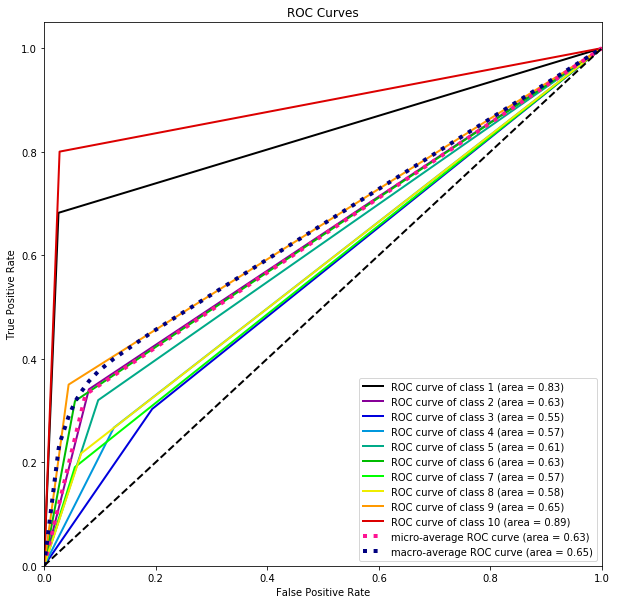

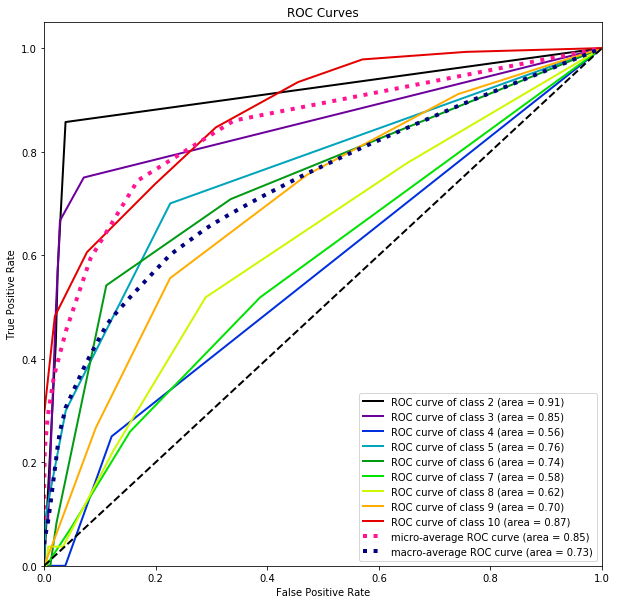

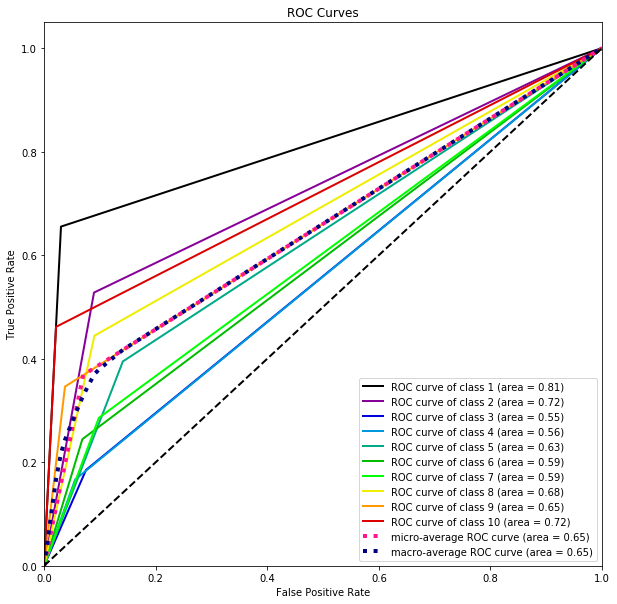

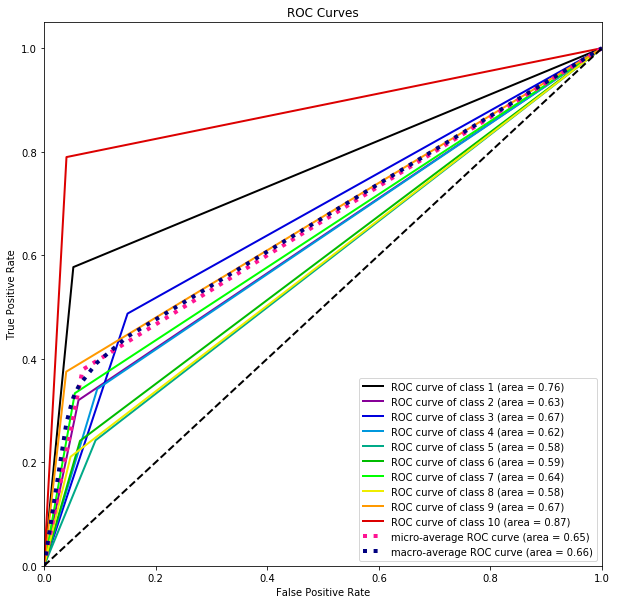

In [36]:
for year in ['00', '01', '02', '03']:
    X_test = knn_data_model[year]['test_X']
    y_test = knn_data_model[year]['test_y']
    model = knn_data_model[year]['model']
    plot_roc(X_test, y_test, model)

#### Vanilla RNN

In [32]:
final


{'dt': {'00': {'accuracy': 0.85741000000000001,
   'f1_weighted': 0.85348000000000002,
   'precision_weighted': 0.87029999999999996,
   'recall_weighted': 0.85741000000000001},
  '01': {'accuracy': 0.82782999999999995,
   'f1_weighted': 0.80220999999999998,
   'precision_weighted': 0.80247000000000002,
   'recall_weighted': 0.82782999999999995},
  '02': {'accuracy': 0.86165000000000003,
   'f1_weighted': 0.86258000000000001,
   'precision_weighted': 0.88478000000000001,
   'recall_weighted': 0.86165000000000003},
  '03': {'accuracy': 0.86770999999999998,
   'f1_weighted': 0.86284000000000005,
   'precision_weighted': 0.88183,
   'recall_weighted': 0.86770999999999998}},
 'knn': {'00': {'accuracy': 0.27423999999999998,
   'f1_weighted': 0.26852999999999999,
   'precision_weighted': 0.29322999999999999,
   'recall_weighted': 0.27423999999999998},
  '01': {'accuracy': 0.35726999999999998,
   'f1_weighted': 0.31315999999999999,
   'precision_weighted': 0.34433999999999998,
   'recall_weigh

In [33]:
# accuracy = []
# f1_weighted = []
# precision_weighted = []
# recall_weighted = []
accuracy

[0.85741000000000001,
 0.82782999999999995,
 0.86165000000000003,
 0.86770999999999998,
 0.84194000000000002,
 0.85975999999999997,
 0.96691000000000005,
 0.86129999999999995,
 0.52944999999999998,
 0.70628999999999997,
 0.49251,
 0.50151000000000001,
 0.27423999999999998,
 0.35726999999999998,
 0.34381,
 0.26551000000000002]

In [35]:
models = pd.DataFrame({
    'Model': ['Decision Tree_00', 'Decision Tree_01', 'Decision Tree_02', 'Decision Tree_03',
              'Support Vector Machines_00', 'Support Vector Machines_01', 'Support Vector Machines_02', 'Support Vector Machines_03',
              'Logistic Regression_00', 'Logistic Regression_01', 'Logistic Regression_02', 'Logistic Regression_03', 
             'K_Nearest_Neighbors_00', 'K_Nearest_Neighbors_01', 'K_Nearest_Neighbors_02', 'K_Nearest_Neighbors_03'],
    'accuracy': accuracy,
    'f1_weighted': f1_weighted,
    'precision_weighted': precision_weighted,
    'recall_weighted': recall_weighted
})

models

,Model,accuracy,f1_weighted,precision_weighted,recall_weighted
0,Decision Tree_00,0.85741,0.85348,0.87030,0.85741
1,Decision Tree_01,0.82783,0.80221,0.80247,0.82783
2,Decision Tree_02,0.86165,0.86258,0.88478,0.86165
3,Decision Tree_03,0.86771,0.86284,0.88183,0.86771
4,Support Vector Machines_00,0.84194,0.83528,0.88119,0.84194
5,Support Vector Machines_01,0.85976,0.85363,0.87554,0.85976
6,Support Vector Machines_02,0.96691,0.96652,0.97015,0.96691
7,Support Vector Machines_03,0.86130,0.85504,0.87531,0.86130
8,Logistic Regression_00,0.52945,0.47508,0.51212,0.52740
9,Logistic Regression_01,0.70629,0.67722,0.66837,0.70625
